In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [18]:
# reading train data
train_data=pd.read_parquet("/content/train.parquet")

In [19]:
## print first 5 rows
train_data.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


In [5]:
#dtypes tells us "data types" for each column
train_data.dtypes

Patient-Uid            object
Date           datetime64[ns]
Incident               object
dtype: object

In [6]:
train_data['Incident'].unique()

array(['PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0', 'DRUG_TYPE_0',
       'DRUG_TYPE_1', 'DRUG_TYPE_2', 'TEST_TYPE_0', 'DRUG_TYPE_3',
       'DRUG_TYPE_4', 'DRUG_TYPE_5', 'DRUG_TYPE_6', 'DRUG_TYPE_8',
       'DRUG_TYPE_7', 'SYMPTOM_TYPE_1', 'DRUG_TYPE_10', 'SYMPTOM_TYPE_29',
       'SYMPTOM_TYPE_2', 'DRUG_TYPE_11', 'DRUG_TYPE_9', 'DRUG_TYPE_13',
       'SYMPTOM_TYPE_5', 'TEST_TYPE_1', 'SYMPTOM_TYPE_6', 'TEST_TYPE_2',
       'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_8', 'DRUG_TYPE_14', 'DRUG_TYPE_12',
       'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_7',
       'SYMPTOM_TYPE_11', 'TEST_TYPE_3', 'DRUG_TYPE_15', 'SYMPTOM_TYPE_4',
       'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_16',
       'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_18',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_21',
       'DRUG_TYPE_17', 'SYMPTOM_TYPE_22', 'TEST_TYPE_4',
       'SYMPTOM_TYPE_23', 'DRUG_TYPE_16', 'TEST_TYPE_5',
       'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_25',
   

In [7]:
#The number of occurrences for a specific incident
train_data.Incident.value_counts()

DRUG_TYPE_6          561934
DRUG_TYPE_1          484666
PRIMARY_DIAGNOSIS    431902
DRUG_TYPE_0          300005
DRUG_TYPE_7          258782
DRUG_TYPE_2          256841
DRUG_TYPE_8          160066
DRUG_TYPE_3          127676
TEST_TYPE_1           96810
TARGET DRUG           67218
DRUG_TYPE_9           66894
DRUG_TYPE_5           57510
DRUG_TYPE_11          48118
SYMPTOM_TYPE_0        46078
SYMPTOM_TYPE_6        32066
TEST_TYPE_0           27570
SYMPTOM_TYPE_7        22019
DRUG_TYPE_10          20925
DRUG_TYPE_14          17306
DRUG_TYPE_13          12372
DRUG_TYPE_12           9551
SYMPTOM_TYPE_14        8927
SYMPTOM_TYPE_1         8608
SYMPTOM_TYPE_2         8168
TEST_TYPE_3            8115
SYMPTOM_TYPE_5         7583
SYMPTOM_TYPE_8         7430
TEST_TYPE_2            7021
SYMPTOM_TYPE_15        6295
SYMPTOM_TYPE_10        6005
SYMPTOM_TYPE_29        5950
SYMPTOM_TYPE_16        4940
DRUG_TYPE_15           4906
SYMPTOM_TYPE_9         4885
DRUG_TYPE_4            4566
SYMPTOM_TYPE_4      

In [8]:
# taking users who are all taking target drug
target_data = train_data[train_data['Incident'] == 'TARGET DRUG']

In [20]:

# Calculate dropoff rate by month
target_data['Date'] = pd.to_datetime(target_data['Date'])
target_data['Month'] = target_data['Date'].dt.month
dropoff_rates = target_data.groupby('Month')['Patient-Uid'].nunique().diff().fillna(0)

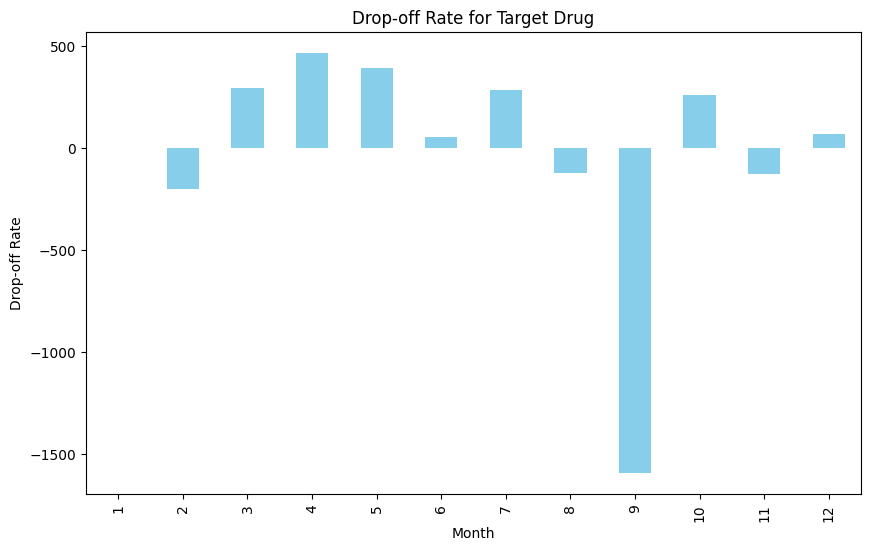

In [21]:
# Visualize dropoff rates
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
dropoff_rates.plot(kind='bar', color='skyblue')
plt.title('Drop-off Rate for Target Drug')
plt.xlabel('Month')
plt.ylabel('Drop-off Rate')
plt.show()

In [11]:
# Assuming dropoff_rates is a pandas Series or DataFrame
mean_dropoff_rate = dropoff_rates.mean()
median_dropoff_rate = dropoff_rates.median()
max_dropoff_rate = dropoff_rates.max()
min_dropoff_rate = dropoff_rates.min()
std_dev_dropoff_rate = dropoff_rates.std()

print(f"Mean Drop-off Rate: {mean_dropoff_rate}")
print(f"Median Drop-off Rate: {median_dropoff_rate}")
print(f"Maximum Drop-off Rate: {max_dropoff_rate}")
print(f"Minimum Drop-off Rate: {min_dropoff_rate}")
print(f"Standard Deviation of Drop-off Rate: {std_dev_dropoff_rate}")


Mean Drop-off Rate: -18.333333333333332
Median Drop-off Rate: 62.5
Maximum Drop-off Rate: 467.0
Minimum Drop-off Rate: -1593.0
Standard Deviation of Drop-off Rate: 541.1083462895785


Mean Drop-off Rate: The average drop-off rate is approximately -18.33. This indicates, on average, a decrease in usage of the target drug over the observed period. The negative value suggests more discontinuations than new users.

Median Drop-off Rate: The median drop-off rate is 62.5. This means that half of the observed drop-off rates fall below 62.5, and half fall above. This is useful in understanding the central tendency of the data.

Maximum Drop-off Rate: The highest recorded drop-off rate is 467.0. This indicates a significant discontinuation of usage in that particular month.

Minimum Drop-off Rate: The lowest recorded drop-off rate is -1593.0. A negative drop-off rate could potentially suggest an increase in usage, which may be unusual.

Standard Deviation of Drop-off Rate: The standard deviation is approximately 541.11. This measures the amount of variation or dispersion in the drop-off rates. A high standard deviation indicates a wider range of values from the mean, suggesting a more variable pattern in drop-off rates.

In [13]:
# to analyze events driving dropp-off
dropoff_reasons = train_data[train_data['Patient-Uid'].isin(target_data['Patient-Uid'])]
dropoff_reasons = dropoff_reasons[dropoff_reasons['Date'] < dropoff_reasons.groupby('Patient-Uid')['Date'].transform('max')]
dropoff_reasons = dropoff_reasons[dropoff_reasons['Incident'] != 'TARGET DRUG']


In [14]:
# to calculate the frequency of each event leading to drop-off
event_freq = dropoff_reasons['Incident'].value_counts()

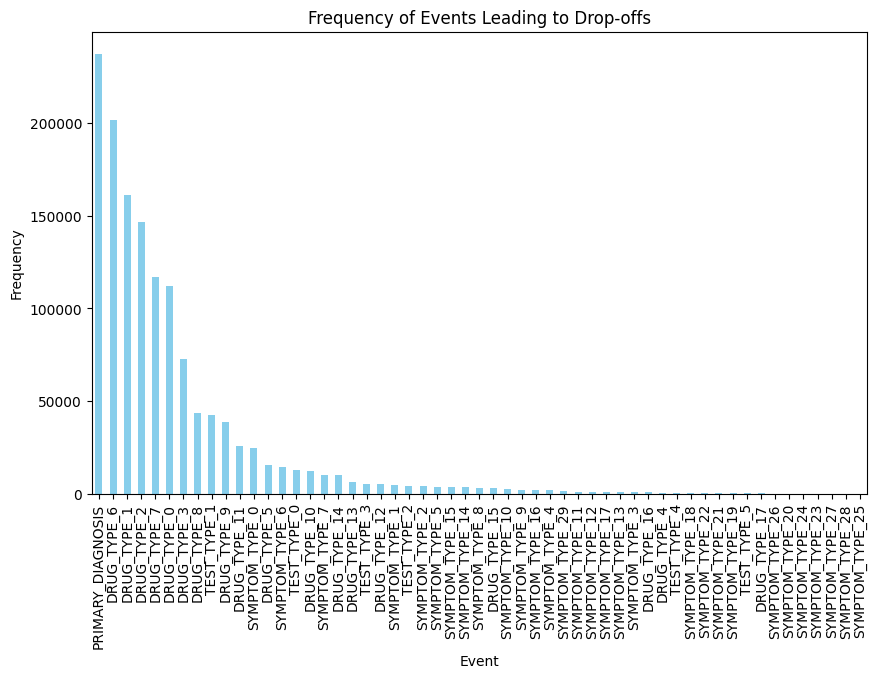

In [15]:
import matplotlib.pyplot as plt

# Create a bar chart for event frequency
plt.figure(figsize=(10, 6))
event_freq.plot(kind='bar', color='skyblue')
plt.title('Frequency of Events Leading to Drop-offs')
plt.xlabel('Event')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


In [16]:
# Assuming event_freq is a pandas Series or DataFrame
mean_frequency = event_freq.mean()
median_frequency = event_freq.median()
max_frequency = event_freq.max()
min_frequency = event_freq.min()
std_dev_frequency = event_freq.std()

print(f"Mean Event Frequency: {mean_frequency}")
print(f"Median Event Frequency: {median_frequency}")
print(f"Maximum Event Frequency: {max_frequency}")
print(f"Minimum Event Frequency: {min_frequency}")
print(f"Standard Deviation of Event Frequency: {std_dev_frequency}")

print(f"\nDescription:")
print("The bar chart displays the frequency of events leading to drop-offs. Each bar represents a different event, and its height indicates the frequency of occurrence.")


Mean Event Frequency: 24697.363636363636
Median Event Frequency: 2886.0
Maximum Event Frequency: 237455
Minimum Event Frequency: 3
Standard Deviation of Event Frequency: 52666.34898299533

Description:
The bar chart displays the frequency of events leading to drop-offs. Each bar represents a different event, and its height indicates the frequency of occurrence.


if you have an event named "Event A" with a frequency of 10,000, it means that "Event A" occurred 10,000 times before a drop-off event in your dataset.

Mean Event Frequency: The average frequency of events leading to drop-offs is approximately 24,697.36. This indicates, on average, how often events occur before a drop-off.

Median Event Frequency: The middle value of the frequencies is 2,886. This means that half of the events occur more frequently than this value, and half occur less frequently.

Maximum Event Frequency: The highest recorded frequency of an event leading to a drop-off is 237,455. This suggests that there are certain events that occur very frequently before drop-offs.

Minimum Event Frequency: The lowest recorded frequency of an event leading to a drop-off is 3. This is the least number of times an event occurs before a drop-off.

Standard Deviation of Event Frequency: The standard deviation is approximately 52,666.35. This measures the amount of variation or dispersion in the event frequencies. A high standard deviation indicates more variability.